# ДЗ №1 СУНЦ МГУ - Numpy practice

_Задачи позаимствованы из курса ML ФКН ПМИ где они были позаимствованы из курса практикума кафедры ММП факультета ВМК МГУ_

### Туториальные задачи
__(9 баллов)__

Ниже приведены задачи на работу с numpy-массивами. Для каждой из задач нужно привести 2 реализации: одна без использования numpy (cчитайте, что там, где на входе или выходе должны быть numpy array, будут просто списки), а вторая полностью векторизованная (без использования питоновских циклов/map/list comprehension). Невекторизованная реализация каждой из задач оценивается в __0.5 балла__, векторизованная – в __1 балл__.

Реализации без использования векторизации нужно записать в файл functions.py, а векторизованные &mdash; в файл functions_vectorized.py

Для каждой задачи, приведённой ниже сравните скорость работы невекторизованной и векторизованной реализации. С помощью пакета matplotlib постройте графики времени работы в зависимости от размера данных. __Графики должны выглядеть опрятно!__

## Решение

Ниже представлена реализация функций ДЗ, а также функций тестирования. В каждой задаче есть __3 функции__:

- Функция *simple*. Описывает невекторизованное решение.
- Функция *vect*. Описывает векторизованное решение.
- Функция *gen*. Генератор. Принимает на вход $sz$ - линейный размер входных данных или $-1$, если необходимо сгенерировать случайный тест. Возвращает True/False (совпадают ли ответы), если $sz = -1$, или пару времен работы простого и векторизованного решения иначе.

Вспомогательные функции:

- Функция *paint*. Рисует графики. Принимает $k$ - кол-во точек измерения, $step$ - расстояние между соседними точками.
- Функция *stress*. Производит тестирование. Принимает $tests$ - кол-во тестов.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from time import time

In [2]:
def paint(gen, step=100, k=25):
    sizes = np.array([i * step + 1 for i in range(0, k)])
    simplearr, vectarr = [], []

    for i in range(0, k):
        (st, vt) = gen(sizes[i])
        simplearr.append(st)
        vectarr.append(vt)

    simplearr = np.array(simplearr)
    vectarr = np.array(vectarr)

    plt.plot(sizes, simplearr, label=u"Невекторизованная")
    plt.plot(sizes, vectarr, label=u"Векторизованная")
    plt.xlabel("Линейные размеры данных")
    plt.ylabel("Время")
    plt.grid()
    plt.legend()

    plt.show()

def stress(gen, tests=100):
    for _ in range(tests):
        if not gen(-1):
            return False
        print(f"Test {_} complete!")
    return True

* __Задача 1__: Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы.  
 Например, для X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) ответ – 3.

In [3]:
def nonzero_diag_simple(X: list):
    n, m = len(X), len(X[0])
    cnt = np.int64(1)
    for i in range(min(n, m)):
        if X[i][i] != 0:
            cnt *= X[i][i]
    return cnt

def nonzero_diag_vect(X: np.ndarray):
    diag = X.diagonal().copy()
    diag[diag == 0] = 1
    return diag.prod()


def nonzero_diag_gen(sz: int):
    if sz == -1:
        n = randint(1, 1000)
        m = randint(1, 1000)
    else:
        n = sz
        m = sz

    arr = [[0 if randint(0, 1) == 0 else randint(-1000000000, 1000000000) for _ in range(m)] for _ in range(n)]
    start = time()
    simple_ans = nonzero_diag_simple(arr)
    simple_time = time() - start
    arr = np.array(arr)
    start = time()
    vect_ans = nonzero_diag_vect(arr)
    vect_time = time() - start
    return simple_ans == vect_ans if sz == -1 else (simple_time, vect_time)


In [4]:
stress(nonzero_diag_gen)

/tmp/ipykernel_4049/441948467.py:6: RuntimeWarning: overflow encountered in scalar multiply
  cnt *= X[i][i]


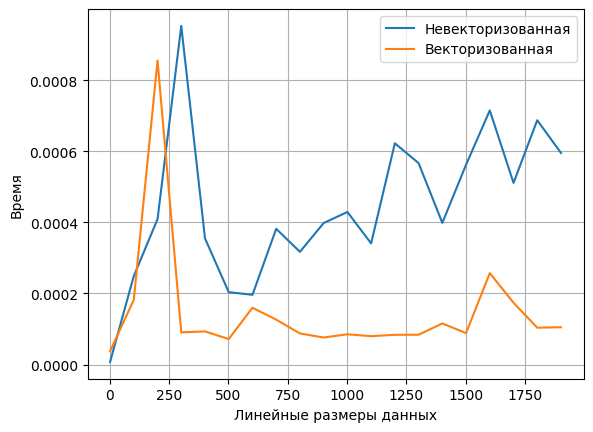

In [6]:
paint(nonzero_diag_gen, step=100, k=20)



* __Задача 2__: Даны два вектора x и y. Проверить, задают ли они одно и то же мультимножество.  
  Например, для x = np.array([1, 2, 2, 4]), y = np.array([4, 2, 1, 2]) ответ – True.
  
  


In [8]:
def multiset_simple(x: list, y: list):
    return sorted(x) == sorted(y)

def multiset_vect(x: np.ndarray, y: np.ndarray):
    return np.array_equal(np.sort(x), np.sort(y))

def multiset_gen(sz: int):
    if sz == -1:
        t = randint(0, 2)
        n = randint(1, 30000)
        x = [randint(1, 1000000000) for _ in range(n)]
        if t == 0:
            m = randint(1, 300000)
            y = [randint(1, 1000000000) for _ in range(m)]
        elif t == 1:
            m = n
            y = [randint(1, 1000000000) for _ in range(m)]
        else:
            m = n
            y = x
    else:
        type = randint(0, 1)
        n = sz
        x = [randint(1, 1000000000) for _ in range(n)]
        if type == 0:
            y = x
        else:
            y = [randint(1, 1000000000) for _ in range(n)]
    nx = np.array(x)
    ny = np.array(y)
    start = time()
    sa = multiset_simple(x, y)
    st = time() - start
    start = time()
    va = multiset_vect(nx, ny)
    vt = time() - start

    return sa == va if sz == -1 else (st, vt)

In [ ]:
stress(multiset_gen)

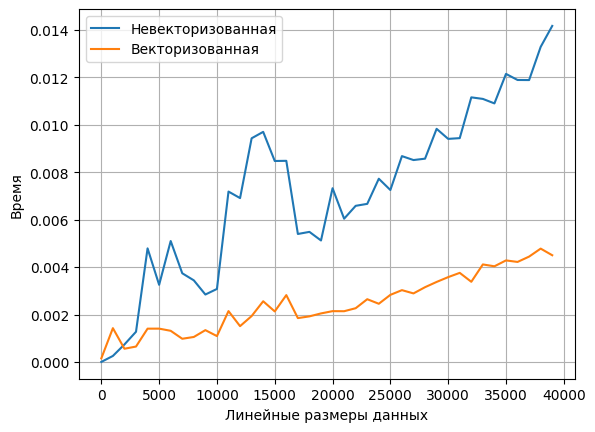

In [9]:
paint(multiset_gen, step=1000, k=40)

* __Задача 3__: Найти максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой.  
 Например, для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответ – 5.

In [10]:
def max_zero_simple(x: list):
    ind = -1
    for i in range(1, len(x)):
        if x[i - 1] != 0:
            continue
        if ind == -1 or x[ind] < x[i]:
            ind = i
    if ind == -1:
        return None
    return x[ind]

def max_zero_vect(x: np.ndarray):
    y = np.roll(x, 1)
    y[0] = -1
    try:
        return x[y == 0].max()
    except:
        return None

def max_zero_gen(sz: int):
    if sz == -1:
        n = randint(0, 300000)
    else:
        n = sz
    x = [randint(1, 1000000000) if randint(0, 1) == 0 else 0 for _ in range(n)]
    nx = np.array(x)
    start = time()
    sa = max_zero_simple(x)
    st = time() - start
    start = time()
    va = max_zero_vect(nx)
    vt = time() - start

    return sa == va if sz == -1 else (st, vt)

In [ ]:
stress(max_zero_gen)

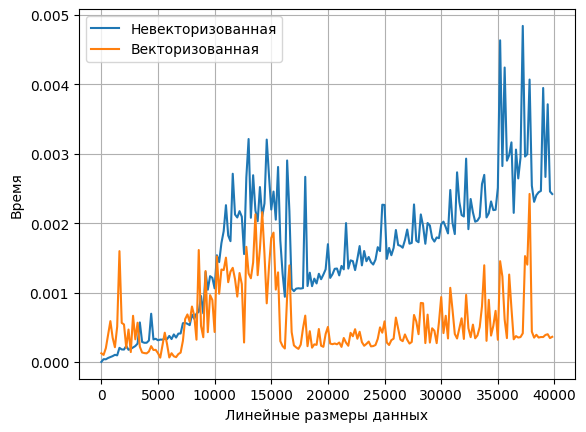

In [11]:
paint(max_zero_gen, step=200, k=200)



* __Задача 4__: Дан трёхмерный массив, содержащий изображение, размера (height, width, numChannels), а также вектор длины numChannels. Сложить каналы изображения с указанными весами, и вернуть результат в виде матрицы размера (height, width). В ноутбуке приведите пример работы функции – преобразуйте цветное изображение в оттенки серого, использовав коэффициенты np.array([0.299, 0.587, 0.114]). Считать реальное изображение можно при помощи функции scipy.misc.imread (если изображение не в формате png, установите пакет pillow).


In [18]:
from imageio.v2 import imread
from imageio import imsave
from PIL import Image

def image_simple(arr: list, coefs: list):
    height = len(arr)
    width = len(arr[0])
    res = [[0 for _ in range(width)] for _ in range(height)]
    for i in range(height):
        for j in range(width):
            for k in range(len(coefs)):
                res[i][j] += arr[i][j][k] * coefs[k]
    return res

def image_vect(arr: np.ndarray, coefs: np.ndarray):
    return np.dot(arr, coefs)

def image_test(uri, target_uri):
    data = imread(uri)
    data = image_vect(data, np.array([0.299, 0.587, 0.114]))
    data = np.dstack([data, data, data])
    imsave(target_uri, data.astype('uint8'))
    img = Image.open(target_uri)
    plt.imshow(img)
    plt.show()

def image_gen(sz: int):
    if sz == -1:
        n = randint(1, 100)
        m = randint(1, 100)
    else:
        n = sz
        m = sz
    x = [[[randint(0, 255), randint(0, 255), randint(0, 255)] for _ in range(m)] for _ in range(n)]
    nx = np.array(x).astype('uint8')
    start = time()
    sa = image_simple(x, [0.299, 0.587, 0.114])
    st = time() - start
    start = time()
    va = image_vect(nx, np.array([0.299, 0.587, 0.114]))
    vt = time() - start
    return np.array_equal(sa, va) if sz == -1 else (st, vt)

In [13]:
stress(image_gen)

/tmp/ipykernel_4049/3034398825.py:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  data = imread(uri)


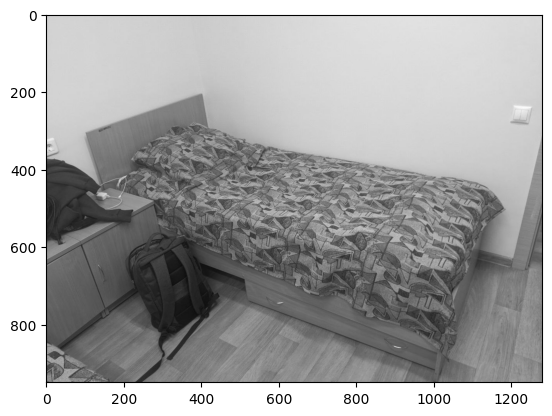

In [20]:
image_test('/home/semen/Development/aescml/aesc_machine_learning/homework_1/test/test_img.png', 
           '/home/semen/Development/aescml/aesc_machine_learning/homework_1/test/res_img.png')

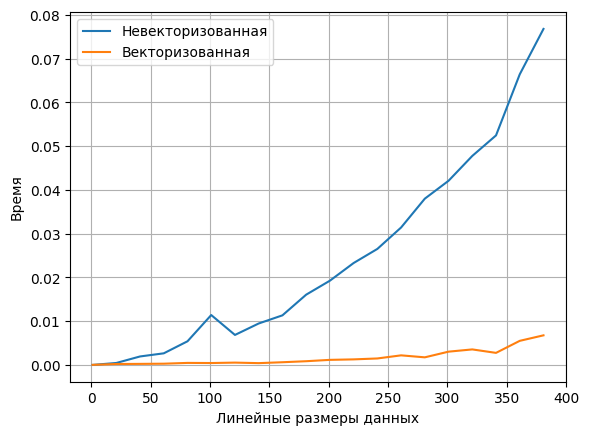

In [15]:
paint(image_gen, step=20, k=20)

* __Задача 5__: Реализовать кодирование длин серий (Run-length encoding). Для некоторого вектора x необходимо вернуть кортеж из двух векторов одинаковой длины. Первый содержит числа, а второй - сколько раз их нужно повторить.  
 Например, для x = np.array([2, 2, 2, 3, 3, 3, 5]) ответ – (np.array([2, 3, 5]), np.array([3, 3, 1])).

In [ ]:
def encode_simple(x: list):
    a = []
    cnt = []
    for i in range(len(x)):
        if i == 0 or x[i] != x[i - 1]:
            a.append(x[i])
            cnt.append(0)
        cnt[-1] += 1
    return (a, cnt)

def encode_vect(x: np.ndarray):
    y = np.cumsum(np.ones(len(x)))
    d = np.hstack([np.array([1]), np.diff(x)])
    val = x[d != 0]
    dist = np.diff(np.hstack([y[d != 0], np.array([len(x) + 1])])).astype('int64')
    return (val, dist)

def encode_gen(sz: int):
    if sz == -1:
        n = randint(1, 100000)
    else:
        n = sz
    x = [randint(0, 1000000000)]
    for i in range(1, n):
        x.append(x[-1] if randint(0, 1) == 0 else randint(0, 1000000000))
    nx = np.array(x)
    start = time()
    sa = encode_simple(x)
    st = time() - start
    start = time()
    va = encode_vect(nx)
    vt = time() - start
    return np.array_equal(sa[0], va[0]) and np.array_equal(sa[1], va[1]) if sz == -1 else (st, vt)

In [ ]:
stress(encode_gen)

Test 0 complete!
Test 1 complete!
Test 2 complete!
Test 3 complete!
Test 4 complete!
Test 5 complete!
Test 6 complete!
Test 7 complete!
Test 8 complete!
Test 9 complete!
Test 10 complete!
Test 11 complete!
Test 12 complete!
Test 13 complete!
Test 14 complete!
Test 15 complete!
Test 16 complete!
Test 17 complete!
Test 18 complete!
Test 19 complete!
Test 20 complete!
Test 21 complete!
Test 22 complete!
Test 23 complete!
Test 24 complete!
Test 25 complete!
Test 26 complete!
Test 27 complete!
Test 28 complete!
Test 29 complete!
Test 30 complete!
Test 31 complete!
Test 32 complete!
Test 33 complete!
Test 34 complete!
Test 35 complete!
Test 36 complete!
Test 37 complete!
Test 38 complete!
Test 39 complete!
Test 40 complete!
Test 41 complete!
Test 42 complete!
Test 43 complete!
Test 44 complete!
Test 45 complete!
Test 46 complete!
Test 47 complete!
Test 48 complete!
Test 49 complete!
Test 50 complete!
Test 51 complete!
Test 52 complete!
Test 53 complete!
Test 54 complete!
Test 55 complete!
Te

True

In [ ]:
paint(encode_gen, step=500, k=40)



* __Задача 6__: Даны две выборки объектов - X и Y. Вычислить матрицу евклидовых расстояний между объектами. Дополнительно сравните с функцией scipy.spatial.distance.cdist по скорости работы (сравнения приведите ниже в ноутбуке).

In [ ]:
import scipy.spatial

def distance_simple(X: list, Y: list):
    arr = []
    for x in X:
        arr.append([])
        for y in Y:
            cnt = np.int64(0)
            for xi, yi in zip(x, y):
                cnt += (xi - yi) ** 2
            arr[-1].append(cnt)
    return arr

def distance_vect(X: np.ndarray, Y: np.ndarray):
    xx = np.diagonal(np.dot(X, X.T)).reshape(len(X), 1)
    yy = np.diagonal(np.dot(Y, Y.T)).reshape(1, len(Y))
    xy = np.dot(X, Y.T) * (-2)
    xy += xx
    xy += yy
    return xy

def distance_base(X: np.ndarray, Y: np.ndarray):
    return scipy.spatial.distance.cdist(X, Y)

def distance_gen(sz: int):
    if sz == -1:
        n = randint(1, 100)
        m = randint(1, 100)
    else:
        n = sz
        m = sz
    x = [[randint(-1000000000, 1000000000) for _ in range(m)] for _ in range(n)]
    y = [[randint(-1000000000, 1000000000) for _ in range(m)] for _ in range(n)]
    nx = np.array(x).astype('int64')
    ny = np.array(y).astype('int64')
    start = time()
    sa = distance_simple(x, y)
    st = time() - start
    start = time()
    va = distance_vect(nx, ny)
    vt = time() - start
    start = time()
    distance_base(nx, ny)
    bt = time() - start

    return np.array_equal(sa, va) if sz == -1 else (st, vt, bt)

def distance_paint(step=100, k=25):
    sizes = np.array([i * step + 1 for i in range(0, k)])
    simplearr, vectarr, basearr = [], [], []

    print("Counting started")

    for i in range(0, k):
        (st, vt, bt) = distance_gen(sizes[i])
        simplearr.append(st)
        vectarr.append(vt)
        basearr.append(bt)
        print(f"Step {i} complete!")

    simplearr = np.array(simplearr)
    vectarr = np.array(vectarr)
    basearr = np.array(basearr)

    plt.plot(sizes, simplearr, label="Невекторизованная")
    plt.plot(sizes, vectarr, label="Векторизованная")
    plt.plot(sizes, basearr, label="Системная")
    plt.xlabel("Линейные размеры данных")
    plt.ylabel("Время")
    plt.grid()
    plt.legend()

    plt.show()


In [ ]:
stress(distance_gen)

Test 0 complete!


/tmp/ipykernel_4072/1618004769.py:10: RuntimeWarning: overflow encountered in scalar add
  cnt += (xi - yi) ** 2


Test 1 complete!
Test 2 complete!
Test 3 complete!
Test 4 complete!
Test 5 complete!
Test 6 complete!
Test 7 complete!
Test 8 complete!
Test 9 complete!
Test 10 complete!
Test 11 complete!
Test 12 complete!
Test 13 complete!
Test 14 complete!
Test 15 complete!
Test 16 complete!
Test 17 complete!
Test 18 complete!
Test 19 complete!
Test 20 complete!
Test 21 complete!
Test 22 complete!
Test 23 complete!
Test 24 complete!
Test 25 complete!
Test 26 complete!
Test 27 complete!
Test 28 complete!
Test 29 complete!
Test 30 complete!
Test 31 complete!
Test 32 complete!
Test 33 complete!
Test 34 complete!
Test 35 complete!
Test 36 complete!
Test 37 complete!
Test 38 complete!
Test 39 complete!
Test 40 complete!
Test 41 complete!
Test 42 complete!
Test 43 complete!
Test 44 complete!
Test 45 complete!
Test 46 complete!
Test 47 complete!
Test 48 complete!
Test 49 complete!
Test 50 complete!
Test 51 complete!
Test 52 complete!
Test 53 complete!
Test 54 complete!
Test 55 complete!
Test 56 complete!
T

True

Counting started
Step 0 complete!
Step 1 complete!
Step 2 complete!
Step 3 complete!
Step 4 complete!
Step 5 complete!
Step 6 complete!
Step 7 complete!
Step 8 complete!


/tmp/ipykernel_4072/1618004769.py:10: RuntimeWarning: overflow encountered in scalar add
  cnt += (xi - yi) ** 2


Step 9 complete!
Step 10 complete!
Step 11 complete!
Step 12 complete!
Step 13 complete!
Step 14 complete!
Step 15 complete!
Step 16 complete!
Step 17 complete!
Step 18 complete!
Step 19 complete!
Step 20 complete!
Step 21 complete!
Step 22 complete!
Step 23 complete!
Step 24 complete!
Step 25 complete!
Step 26 complete!
Step 27 complete!
Step 28 complete!
Step 29 complete!
Step 30 complete!
Step 31 complete!
Step 32 complete!
Step 33 complete!
Step 34 complete!
Step 35 complete!
Step 36 complete!
Step 37 complete!
Step 38 complete!
Step 39 complete!


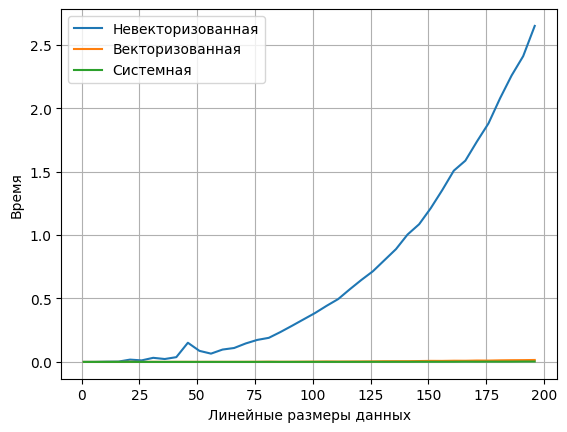

In [ ]:
distance_paint(step=5, k=40)

## Туториал по Markdown

__(1 балл)__

Напишите краткий (а в данной домашке ещё и почти бесмысленный) отчёт с использованием 4-5 различных вариантов разметки/выделения текста.

### Отчёт

---

`(Данный текст представляет собой копию того, что написано наверху)`

Ниже представлена реализация функций ДЗ, а также функций тестирования. В каждой задаче есть __3 функции__:

- Функция *simple*. Описывает невекторизованное решение.
- Функция *vect*. Описывает векторизованное решение.
- Функция *gen*. Генератор. Принимает на вход $sz$ - линейный размер входных данных или $-1$, если необходимо сгенерировать случайный тест. Возвращает True/False (совпадают ли ответы), если $sz = -1$, или пару времен работы простого и векторизованного решения иначе.

Вспомогательные функции:

- Функция *paint*. Рисует графики. Принимает $k$ - кол-во точек измерения, $step$ - расстояние между соседними точками.
- Функция *stress*. Производит тестирование. Принимает $tests$ - кол-во тестов.

Исключения:

- В задаче с изображением есть функция *image_test*, которая обесцвечивает изображение, находящееся в папке *test*.
- В задаче с расстояниями функция *paint* отдельная, т.к. надо рисовать три ломаные.